# Toy Example

In [49]:
#Loading LFW dataset from SKlearn
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=140)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'George W Bush' 'Tony Blair']
(910, 62, 47)


In [50]:
62*47

2914

In [51]:
#faces.images
#faces.data

In [66]:
faces.images[9][54]

array([0.75816995, 0.4627451 , 0.10980392, 0.06405229, 0.06797386,
       0.09673203, 0.20653595, 0.27058825, 0.15555556, 0.1764706 ,
       0.2875817 , 0.3137255 , 0.36209154, 0.40915033, 0.45228758,
       0.49411765, 0.5254902 , 0.51633984, 0.5294118 , 0.5882353 ,
       0.63398695, 0.6470588 , 0.64836603, 0.64967316, 0.64967316,
       0.6535948 , 0.6745098 , 0.68888885, 0.6810458 , 0.67058825,
       0.6732027 , 0.6771242 , 0.6745098 , 0.64705884, 0.6039216 ,
       0.57254905, 0.579085  , 0.58431375, 0.55947715, 0.3620915 ,
       0.09150327, 0.03921569, 0.06405229, 0.07973856, 0.08104575,
       0.09019608, 0.08366013], dtype=float32)

In [67]:
#Importing standard libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

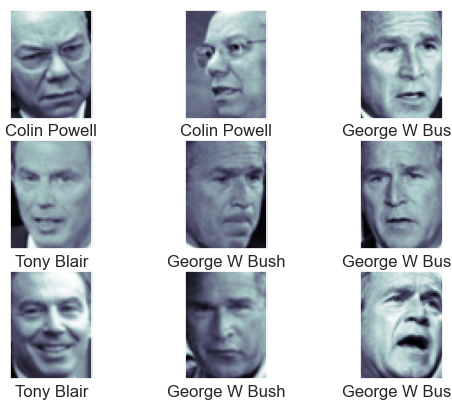

In [68]:
#Displaying a few images with labels
startindex = 100
fig, axi = plt.subplots(3, 3)
for i, axi in enumerate(axi.flat):
    axi.imshow(faces.images[i+startindex], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i+startindex]])

In [99]:
#Import PCA libraries and create a PCA instance
from sklearn.decomposition import PCA
pca = PCA(n_components = 900)
pca.fit(faces.data)

PCA(n_components=900)

In [100]:
len(pca.components_[2])

2914

In [101]:
pca.components_[2]

array([-0.02339987, -0.02225973, -0.02184367, ..., -0.0339383 ,
       -0.03105554, -0.02884516], dtype=float32)

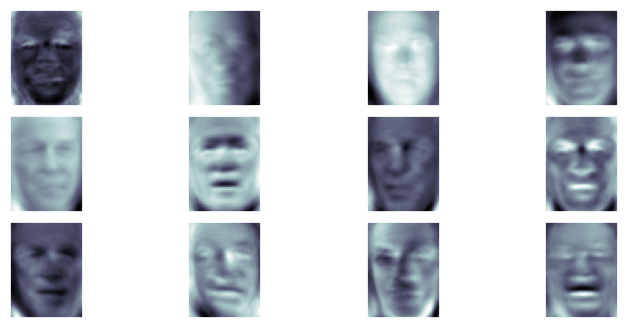

In [102]:
#Plotiing reduced dimensional data:
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

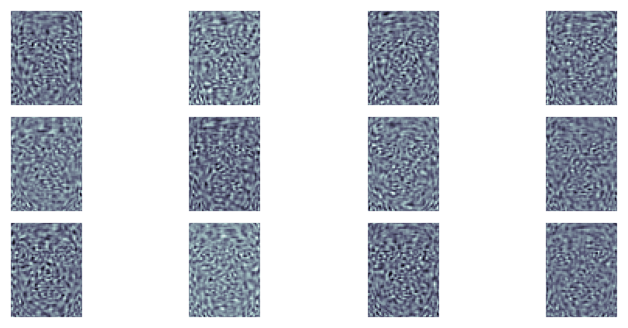

In [103]:
#Plotiing reduced dimensional data:
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i+500].reshape(62, 47), cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

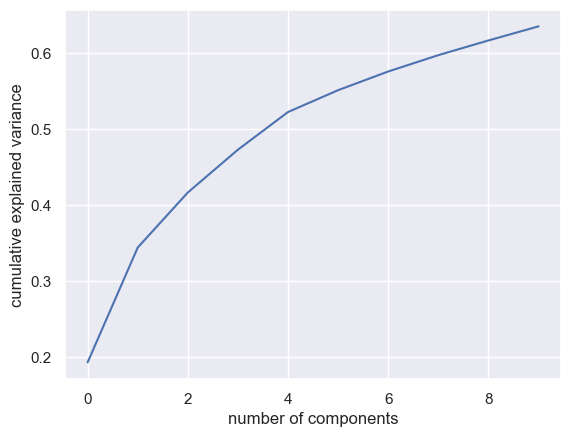

In [73]:
#commultative variance:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, '100-dim\nreconstruction')

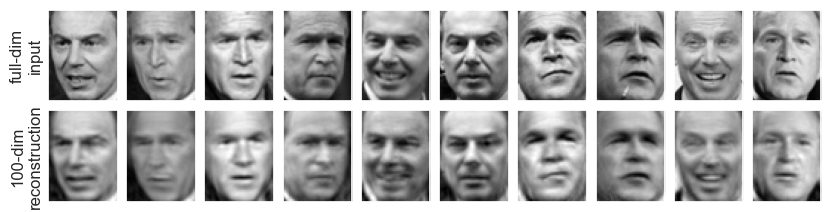

In [74]:
# Compute the components and projected faces
pca = PCA(n_components = 100).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

#COmparing the original and reconstructed faces:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
#Change i below to see the results for other images
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction')

In [75]:
(4324*100+2914*100+100)/(4324*2914)

0.05745176083813699

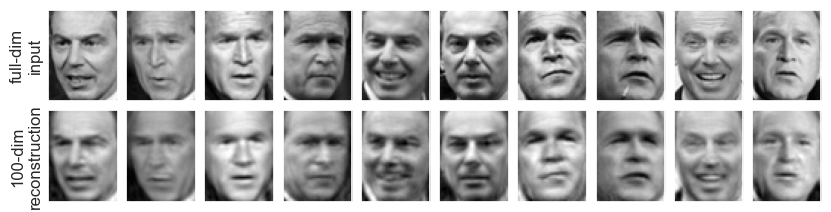

In [79]:
#COmparing the original and reconstructed faces:
# Plot the results
pca = PCA(100).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

In [80]:
910*62*47

2651740

In [81]:
910*100+100*62*47

382400

In [82]:
382400/2651740

0.14420719980088545

In [15]:
X = faces.data
y = faces.target

In [16]:
X.shape

(910, 2914)

In [17]:
910*0.8

728.0

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2, random_state = 3042024)

In [20]:
Xtrain.shape

(728, 2914)

In [23]:
model = LogisticRegression(penalty = None, max_iter = 10000000)
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=10000000, penalty=None)

In [24]:
predictedfacestrain = model.predict(Xtrain)

In [25]:
predictedfacestest = model.predict(Xtest)

In [26]:
confusion_matrix(ytrain,predictedfacestrain)

array([[184,   0,   0],
       [  0, 431,   0],
       [  0,   0, 113]], dtype=int64)

In [27]:
confusion_matrix(ytest,predictedfacestest)

array([[48,  3,  1],
       [ 1, 93,  5],
       [ 1,  4, 26]], dtype=int64)

In [28]:
accuracy_score(ytrain,predictedfacestrain)

1.0

In [29]:
accuracy_score(ytest,predictedfacestest)

0.9175824175824175

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50).fit(Xtrain)
components = pca.transform(Xtrain)


In [34]:
model = LogisticRegression(penalty = None, max_iter=10000000)

In [35]:
model.fit(components,ytrain)

LogisticRegression(max_iter=10000000, penalty=None)

In [36]:
predictedfacestrain = model.predict(components)
confusion_matrix(ytrain,predictedfacestrain)


array([[169,  14,   1],
       [  8, 416,   7],
       [  4,   9, 100]], dtype=int64)

In [37]:
accuracy_score(ytrain,predictedfacestrain)

0.9409340659340659

In [38]:
componentstest = pca.transform(Xtest)
predictedfacestest = model.predict(componentstest)
confusion_matrix(ytest,predictedfacestest)


array([[47,  3,  2],
       [ 2, 93,  4],
       [ 2,  5, 24]], dtype=int64)

In [39]:
accuracy_score(ytest,predictedfacestest)

0.9010989010989011

# LDA + PCA (bringing dimensions down to 2)

In [104]:
from sklearn.decomposition import PCA
dimensiondown = PCA(n_components = 2)
dimensiondown.fit(X)

PCA(n_components=2)

In [105]:
pcatransformeddata=dimensiondown.transform(X)

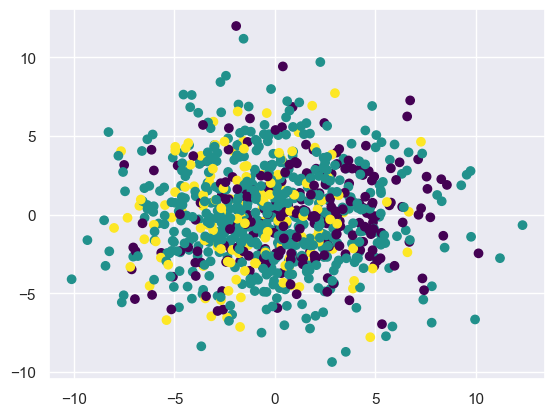

In [106]:
plt.scatter(pcatransformeddata[:,0],pcatransformeddata[:,1], c=y, cmap = 'viridis')
plt.show()

Now, with LDA

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [108]:
X.shape

(910, 2914)

In [109]:
dimensiondown = LDA(n_components = 2)
dimensiondown.fit(X,y)

LinearDiscriminantAnalysis(n_components=2)

In [110]:
ldatransformeddata=dimensiondown.transform(X)

In [111]:
#?LDA

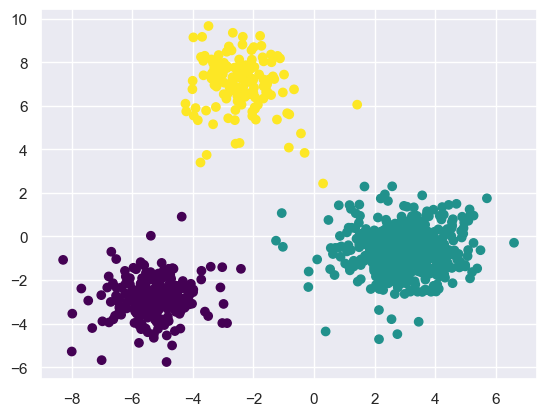

In [112]:
plt.scatter(ldatransformeddata[:,0],ldatransformeddata[:,1], c=y,cmap = 'viridis')
plt.show()